<center><img src="https://matematica.usm.cl/wp-content/themes/dmatUSM/assets/img/logoDMAT2.png" title="Title text" /></center>
<hr style="height:2px;border:none"/>
<h1 align='center'> Modelos GARCH - Series de tiempo</h1>
<h2 align='center'> Diego Astaburuaga, David Rivas </h2>
<hr style="height:2px;border:none"/>

<p style="text-align: center;">
    <img src="https://github.com/Darkrayyss/Proyecto-Final-MAT281/raw/307f0d0f14aefbff8de7698d0c645d680ced6994/Carpet%20for%20Test%201/images/Capy2.png" alt="Capybara trabajando" width="300" style="border: 7px solid black;">
    <br>
    <small>Foto de Diego discutiendo con chatgpt.</small>
</p>

Sea $\varepsilon_t$ un proceso estocástico discreto de valores reales. El proceso $\varepsilon_t$ sigue un modelo $\operatorname{ARCH}(p)$ (AutoRegressive Conditional Heteroscedasticity) si:
\begin{equation*}
    \begin{aligned}
        &\varepsilon_t | F_{t-1} \sim \mathcal{N}\left(0, \sigma_t^2\right), \\
        &\sigma_t^2 = \omega + \sum_{i=1}^{p} \alpha_i \varepsilon_{t-i}^2
    \end{aligned}
\end{equation*}
        
donde $p \geq 0$, $\omega > 0$, $\alpha_i \geq 0$ para $i = 1, \ldots, p$. Donde $F_{t-1}$ denota la información hasta el momento $t-1$.


Luego es claro que
\begin{equation*}
    \begin{aligned}
        \varepsilon_0 & \sim N(0,\sigma_0^2)=N(0,\omega)\\
        \varepsilon_1 & \sim N(0,\sigma_1^2)=N(0,\omega+\alpha_1\varepsilon_0^2)\\
        \varepsilon_2 & \sim N(0,\sigma_2^2)=N(0,\omega+\alpha_1\varepsilon_1^2+\alpha_2\varepsilon_0^2)\\
        \vdots &\\
        \varepsilon_p & \sim N(0,\sigma_p^2)=N(0,\omega+\alpha_1\varepsilon_{p-1}^2+\cdots+\alpha_p\varepsilon_0^2)\\
        \varepsilon_t & \sim N(0,\sigma_t^2),\quad \sigma_t^2=\omega+\sum_{i=1}^p\alpha_i\varepsilon_{t-1}^2, \quad t\geq p
    \end{aligned}
\end{equation*}

Sea $\varepsilon_t$ un proceso estocástico discreto de valores reales. Entonces $\varepsilon_t$ sigue un modelo GARCH$(p, q)$ (Generalized AutoRegressive Conditional Heteroscedasticity) si y sólo si:
\begin{equation*}
    \begin{aligned}
        &\varepsilon_t | F_{t-1} \sim \mathcal{N}\left(0, \sigma_t^2\right),\\
        &\sigma_t^2 = \omega + \sum_{i=1}^{p} \alpha_i \varepsilon_{t-i}^2 + \sum_{j=1}^{q} \beta_j \sigma_{t-j}^2
    \end{aligned}
\end{equation*}
        
donde $p \geq 0$, $q \geq 0$, $\omega > 0$, $\alpha_i \geq 0$ para $i = 1, \ldots, p$, y $\beta_j \geq 0$ para $j = 1, \ldots, q$. Donde $F_{t-1}$ denota la información hasta el momento $t-1$.

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_lm, het_arch

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# ARCH library

In [2]:
#pip install arch

In [3]:
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

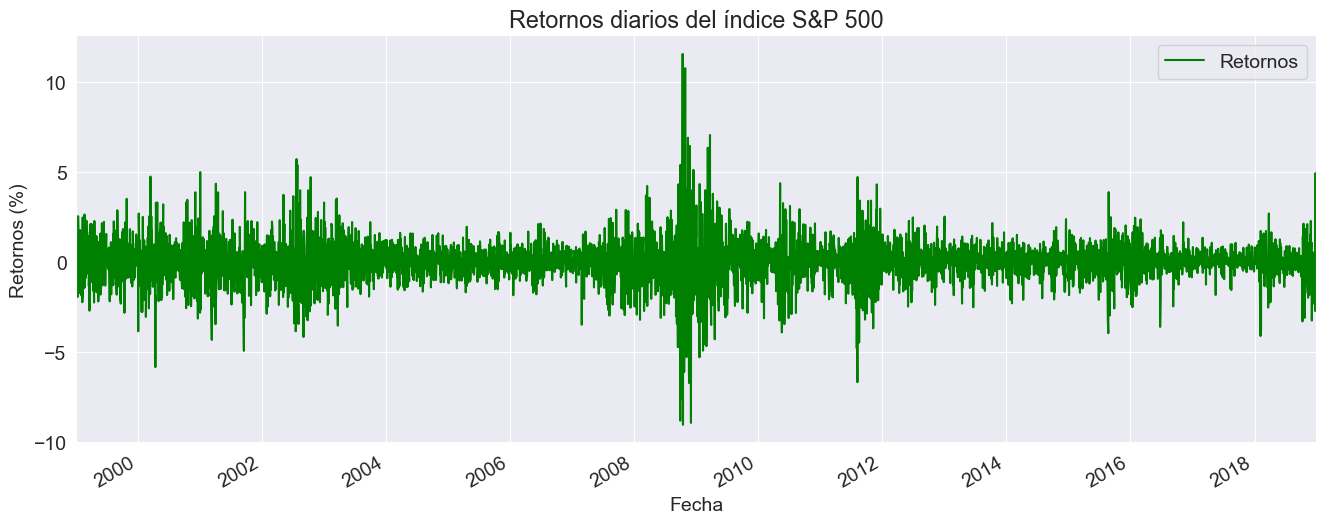

In [4]:
import datetime as dt
import arch.data.sp500

# Cargar datos del índice S&P 500
st = dt.datetime(1988, 1, 1)
en = dt.datetime(2018, 1, 1)
data = arch.data.sp500.load()
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()

# Graficar los retornos
ax = returns.plot(color='green')

# Configurar ejes y etiquetas
xlim = ax.set_xlim(returns.index.min(), returns.index.max())
ax.set_xlabel('Fecha')
ax.set_ylabel('Retornos (%)')
ax.set_title('Retornos diarios del índice S&P 500')

# Mostrar leyenda
ax.legend(["Retornos"])

# Mostrar el gráfico
plt.show()

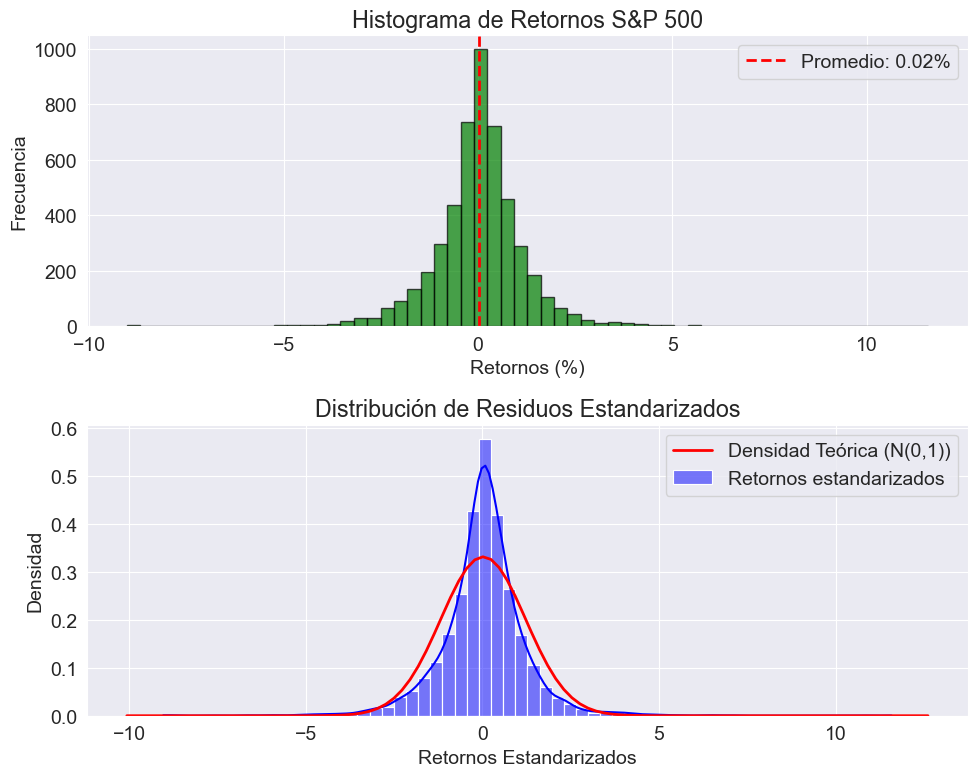

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

# Crear dos subgráficos, uno encima del otro
plt.figure(figsize=(10, 8))

# Primer gráfico: Histograma de retornos
plt.subplot(2, 1, 1)
plt.hist(returns, bins=60, color='green', alpha=0.7, edgecolor='black')

# Añadir una línea vertical para el promedio
average_return = returns.mean()
plt.axvline(average_return, color='red', linestyle='dashed', linewidth=2, label=f'Promedio: {average_return:.2f}%')

# Añadir etiquetas y título
plt.xlabel('Retornos (%)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Retornos S&P 500')
plt.legend()

# Segundo gráfico: Residuos estandarizados y densidad teórica
plt.subplot(2, 1, 2)
sns.histplot(returns, color='blue', kde=True, stat='density', bins=60, label='Retornos estandarizados')
plt.title('Distribución de Residuos Estandarizados')
plt.xlabel('Retornos Estandarizados')
plt.ylabel('Densidad')

# Añadir la curva de densidad teórica (normal 0,1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(returns), np.std(returns))
plt.plot(x, p, 'r', linewidth=2, label='Densidad Teórica (N(0,1))')

# Añadir leyenda
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [47]:
# Test de Ljung-Box
acorr_ljungbox(returns, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,25.644091,4.105507e-07
2,37.592212,6.869970e-09
3,38.452500,2.266896e-08
4,39.710689,4.967649e-08
5,50.933827,8.922949e-10
6,50.966768,3.007757e-09
7,54.580904,1.804924e-09
8,54.993810,4.427174e-09
9,55.649118,9.158700e-09
10,58.112631,8.232677e-09


In [48]:
# Test de heterocedasticidad ARCH
arch_test_stat, arch_p_value, _, _ = het_arch(returns, nlags=10)
print("\nARCH Test:")
print(f"Test Statistic: {arch_test_stat}")
print(f"P-value: {arch_p_value}")


ARCH Test:
Test Statistic: 1273.374301522637
P-value: 2.1306375166104956e-267


Considere el modelo $\operatorname{GARCH}(1,1)$ con errores normales:
\begin{equation*}
\left\{
\begin{aligned}
r_t&=\mu+\epsilon_t\\
\sigma_t^2&=\omega+\alpha \epsilon_{t-1}^2+\beta\sigma_{t-1}^2\\
\epsilon_t&=\sigma_te_t,\quad e_t\sim N(0,1)
\end{aligned}
\right.
\end{equation*}

In [49]:
from arch import arch_model

model = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')

result = model.fit(disp='off')
print(result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Sun, Nov 19 2023   Df Residuals:                     5029
Time:                        22:43:33   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0564  1.149e-02      4.906  9.302e-07 [3.

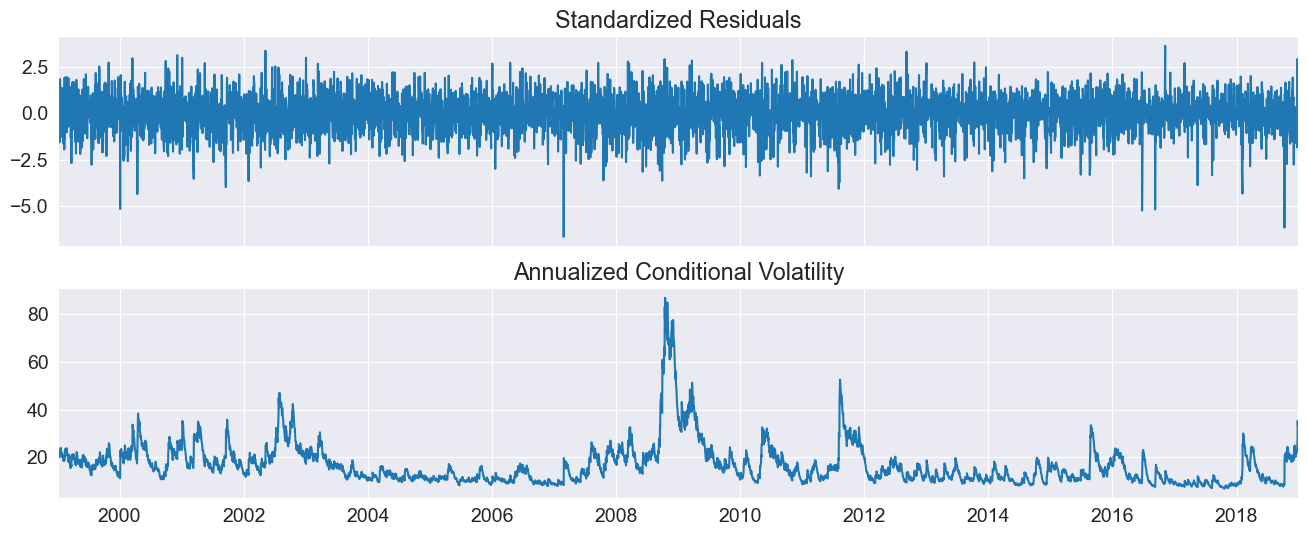

In [50]:
fig = result.plot(annualize="D")

In [51]:
residuals = result.resid

# Perform ARCH LM Test
arch_lm_test_result = result.arch_lm_test(lags=10)
print(arch_lm_test_result)

ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 1288.4502
P-value: 0.0000
Distributed: chi2(10)


In [52]:
# Test de Ljung-Box
acorr_ljungbox(residuals, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,25.644091,4.105507e-07
2,37.592212,6.869970e-09
3,38.452500,2.266896e-08
4,39.710689,4.967649e-08
5,50.933827,8.922949e-10
6,50.966768,3.007757e-09
7,54.580904,1.804924e-09
8,54.993810,4.427174e-09
9,55.649118,9.158700e-09
10,58.112631,8.232677e-09


In [53]:
# Test de heterocedasticidad ARCH
arch_test_stat, arch_p_value, _, _ = het_arch(residuals, nlags=10)
print("\nARCH Test:")
print(f"Test Statistic: {arch_test_stat}")
print(f"P-value: {arch_p_value}")
print("---------------------------------------------")


ARCH Test:
Test Statistic: 1285.8886830513143
P-value: 4.2462805561482654e-270
---------------------------------------------


# Ejemplo de modelo GARCH no estacionario

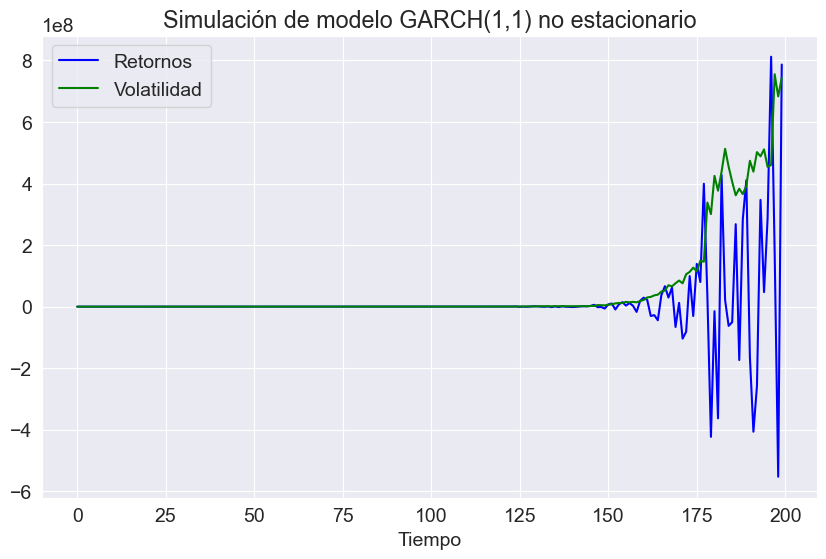

In [54]:
from arch import arch_model

# Function to simulate GARCH(1,1) model without stationarity
def simulate_garch(n_obs):
    # Generate random parameters
    alpha = np.random.uniform(0.5, 0.8)
    beta = np.random.uniform(0.5, 0.8)
    omega = np.random.uniform(0.5, 1.5)

    # Simulate GARCH(1,1) process
    returns = np.zeros(n_obs)
    volatility = np.zeros(n_obs)

    for t in range(1, n_obs):
        epsilon = np.random.normal(size=1)
        volatility[t] = np.sqrt(omega + alpha * returns[t-1]**2 + beta * volatility[t-1]**2)
        returns[t] = volatility[t] * epsilon

    return returns, volatility

# Simulate GARCH(1,1) without stationarity with 500 observations
n_obs = 200
np.random.seed(42)
returns, volatility = simulate_garch(n_obs)

# Plot the simulated GARCH(1,1) process
plt.figure(figsize=(10, 6))
plt.plot(returns, label='Retornos', color='blue')
plt.plot(volatility, label='Volatilidad', color='green')
plt.title('Simulación de modelo GARCH(1,1) no estacionario')
plt.xlabel('Tiempo')
plt.legend()
plt.grid(True)
plt.show()